## About Data and Objective

#### Use Decision Trees to build a regressor & Grid Search to find the optimal value for the hyperparameters for the given dataset, and evaluate your model on the appropriate metrics try and predict gas consumption (in millions of gallons) in 48 US states based upon:
1. Gas Tax (in cents)
2. Per Capita Income (dollars)
3. Paved Highways (in miles) &
4. The proportion of the population with a driver license.

#### Importing Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Fuel_cons=pd.read_csv("petrol_consumption.csv") #Importing Data

In [3]:
Fuel_cons.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Structure and Datatypes of Dataset along with Summary Statistics

In [4]:
print(Fuel_cons.shape)
Fuel_cons.info()

(48, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
pd.options.display.float_format = '{:.4f}'.format
data_summary=Fuel_cons.describe()
data_summary.T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0000,7.6683,0.9508,5.0000,7.0000,7.5000,8.1250,10.0000
Average_income,48.0000,4241.8333,573.6238,3063.0000,3739.0000,4298.0000,4578.7500,5342.0000
Paved_Highways,48.0000,5565.4167,3491.5072,431.0000,3110.2500,4735.5000,7156.0000,17782.0000
Population_Driver_licence(%),48.0000,0.5703,0.0555,0.4510,0.5298,0.5645,0.5952,0.7240
Petrol_Consumption,48.0000,576.7708,111.8858,344.0000,509.5000,568.5000,632.7500,968.0000


###### Checking for Outliers

In [6]:
for k, v in Fuel_cons.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(Fuel_cons)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Petrol_tax outliers = 4.17%
Column Average_income outliers = 0.00%
Column Paved_Highways outliers = 4.17%
Column Population_Driver_licence(%) outliers = 2.08%
Column Petrol_Consumption outliers = 4.17%


<Axes: >

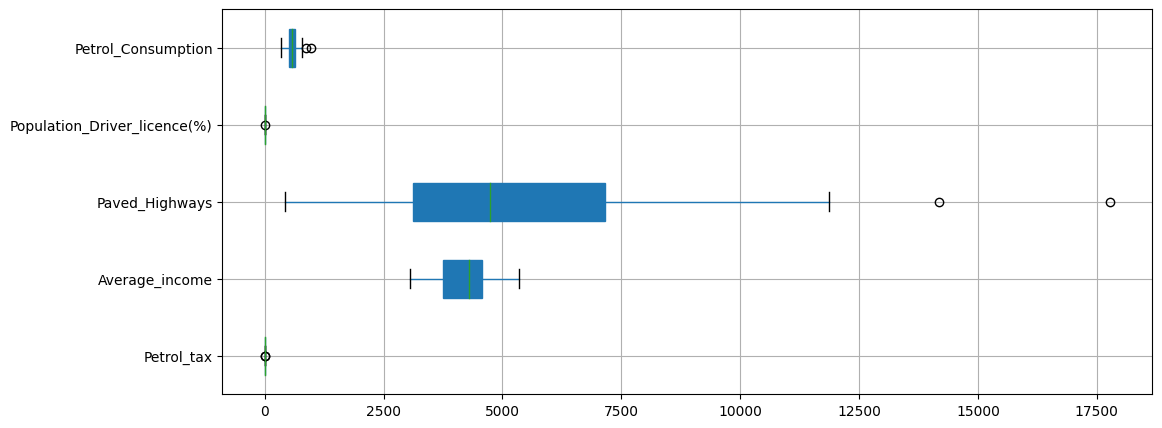

In [7]:
plt.figure(figsize=(12,5))
Fuel_cons.boxplot(patch_artist=True,vert=False)

###### Correlation Chart

In [8]:
my_corr=Fuel_cons.corr()
my_corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.0000,0.0127,-0.5221,-0.2880,-0.4513
Average_income,0.0127,1.0000,0.0502,0.1571,-0.2449
Paved_Highways,-0.5221,0.0502,1.0000,-0.0641,0.0190
Population_Driver_licence(%),-0.2880,0.1571,-0.0641,1.0000,0.6990
Petrol_Consumption,-0.4513,-0.2449,0.0190,0.6990,1.0000


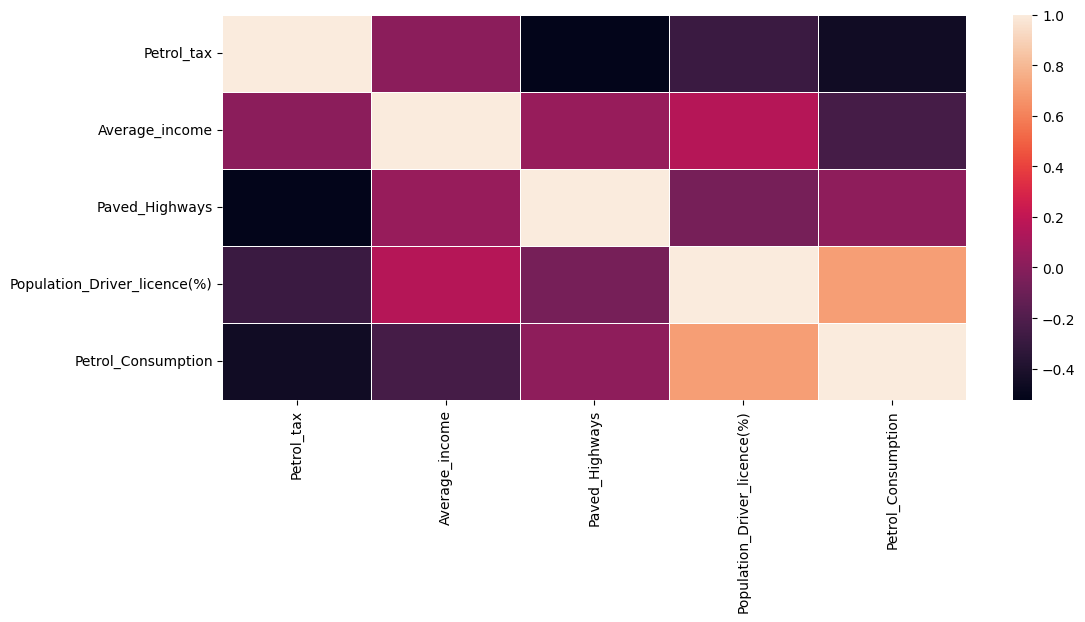

In [9]:
plt.figure(figsize=(12,5))
sns.heatmap(my_corr,linewidth=0.5)
plt.show()

##### Understanding Data: Exploratory Data Analysis 

Calculating Correlation, P-value and Regression plot

To understand the spread of datapoints this regression plot has been plotted along with pearson coefficients.

The Pearson Correlation Coefficient of Petrol_tax is -0.45128027518698666  with a P-value of P = 0.0012848906734289314


(0.0, 999.2)

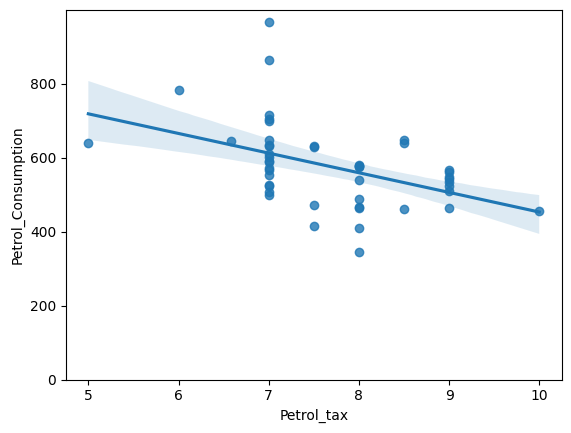

In [10]:
pearson_coef, p_value = stats.pearsonr(Fuel_cons['Petrol_tax'], Fuel_cons['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Petrol_tax", y="Petrol_Consumption", data=Fuel_cons)
plt.ylim(0,)

The Pearson Correlation Coefficient of Petrol_tax is -0.24486207498269905  with a P-value of P = 0.09346842977474587


(0.0, 999.2)

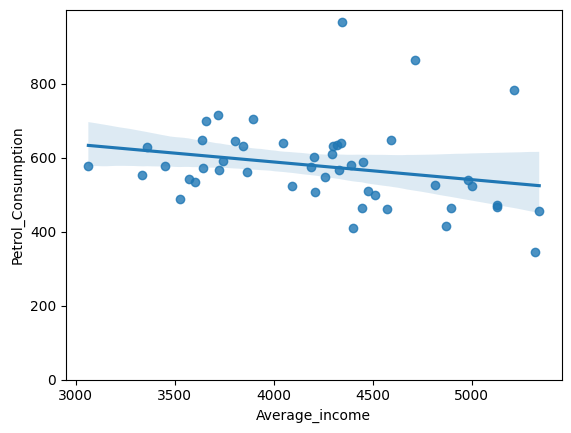

In [11]:
pearson_coef, p_value = stats.pearsonr(Fuel_cons['Average_income'], Fuel_cons['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Average_income", y="Petrol_Consumption", data=Fuel_cons)
plt.ylim(0,)

The Pearson Correlation Coefficient of Petrol_tax is 0.01904193881958576  with a P-value of P = 0.897784600249638


(0.0, 999.2)

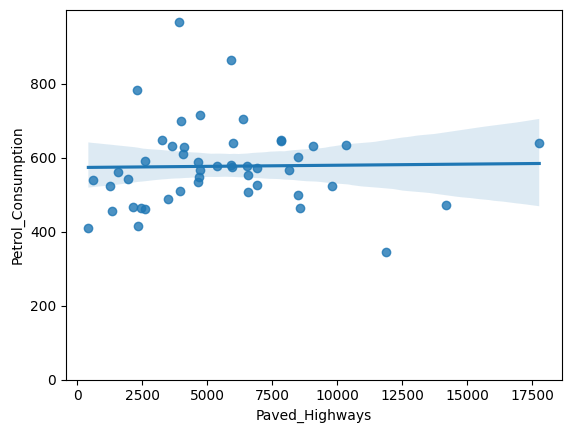

In [12]:
pearson_coef, p_value = stats.pearsonr(Fuel_cons['Paved_Highways'], Fuel_cons['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Paved_Highways", y="Petrol_Consumption", data=Fuel_cons)
plt.ylim(0,)

The Pearson Correlation Coefficient of Petrol_tax is 0.6989654213627077  with a P-value of P = 3.2896049485308266e-08


(0.0, 999.2)

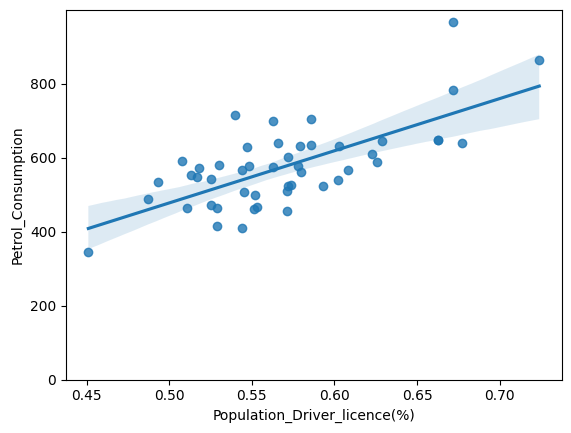

In [13]:
pearson_coef, p_value = stats.pearsonr(Fuel_cons['Population_Driver_licence(%)'], Fuel_cons['Petrol_Consumption'])
print("The Pearson Correlation Coefficient of Petrol_tax is", pearson_coef, " with a P-value of P =", p_value)  
sns.regplot(x="Population_Driver_licence(%)", y="Petrol_Consumption", data=Fuel_cons)
plt.ylim(0,)

##### Knowing about the distribution of Predictors and target of dataset. 

<Axes: xlabel='Petrol_tax', ylabel='Density'>

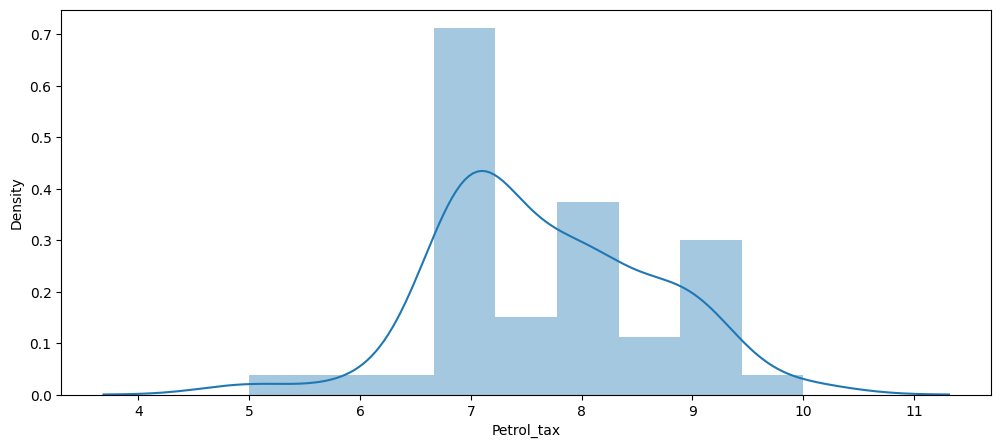

In [14]:
plt.figure(figsize=(12,5))
sns.distplot(Fuel_cons['Petrol_tax'])

<Axes: xlabel='Paved_Highways', ylabel='Density'>

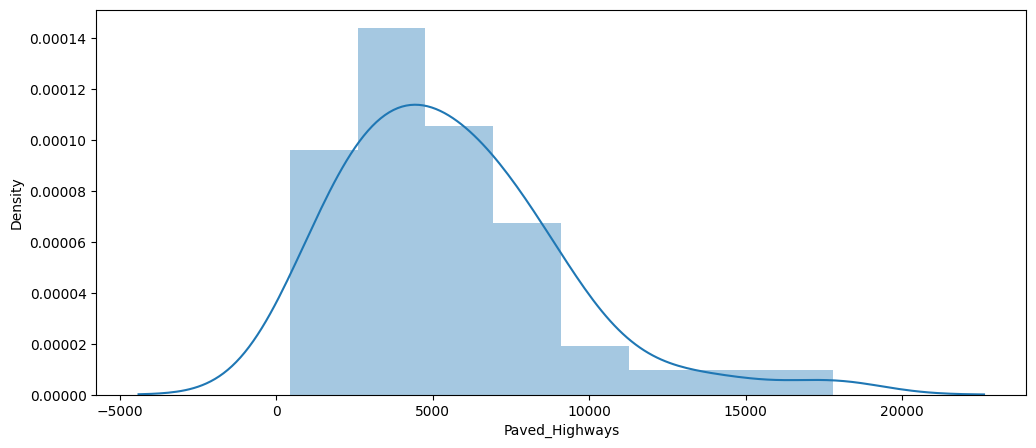

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(Fuel_cons['Paved_Highways'])

<Axes: xlabel='Average_income', ylabel='Density'>

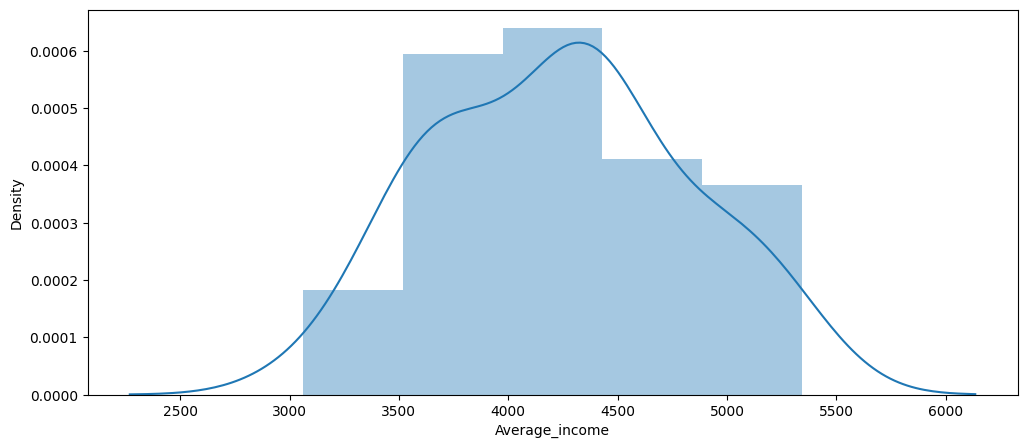

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(Fuel_cons['Average_income'])

<Axes: xlabel='Petrol_Consumption', ylabel='Density'>

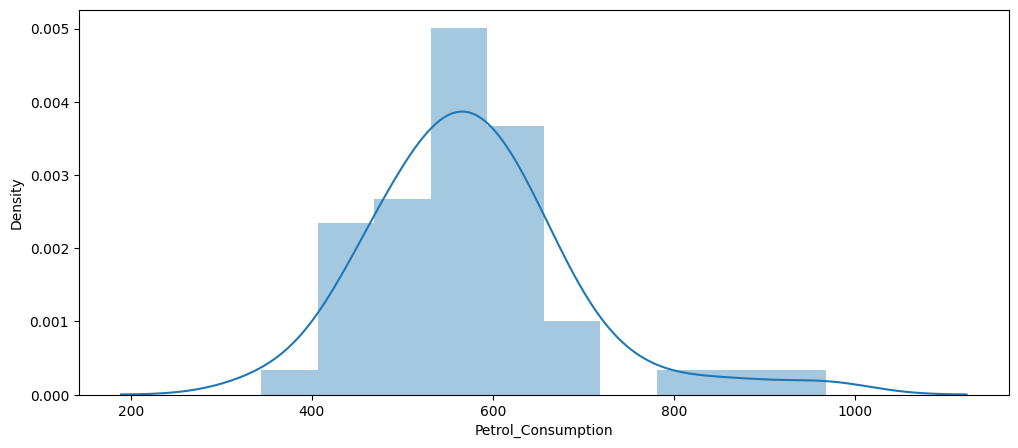

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(Fuel_cons['Petrol_Consumption'])

<Axes: xlabel='Population_Driver_licence(%)', ylabel='Density'>

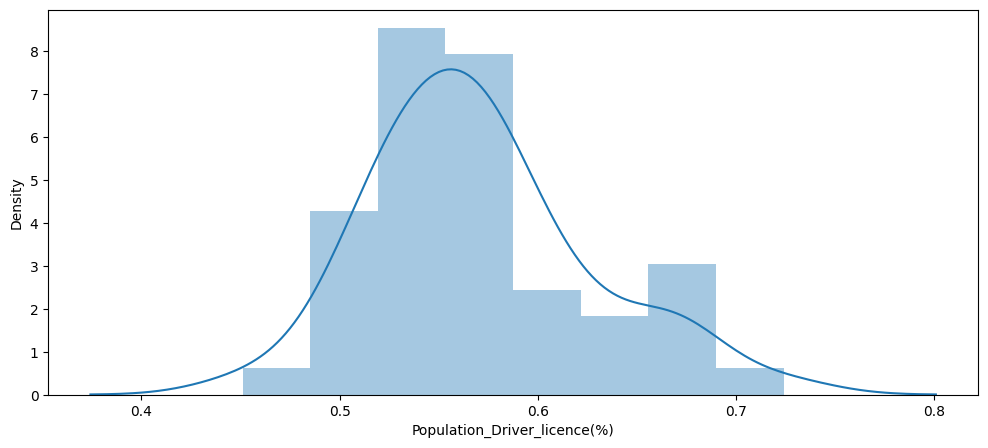

In [18]:
plt.figure(figsize=(12,5))
sns.distplot(Fuel_cons['Population_Driver_licence(%)'])

#### Viz 3: The below plot has been plotted in order to show the Petrol Consumption as per tax.

We can see from the below ploted graph that the bandwith of petrol Consumption with lower petrol tax is smooth shown by (Brown Curve) it has high bandwidth as it has shallow kernel and has high density. When we look at the area under Blue Curve we can see its density and amplitude is low which shows petrol tax with High petrol consumption people are less.

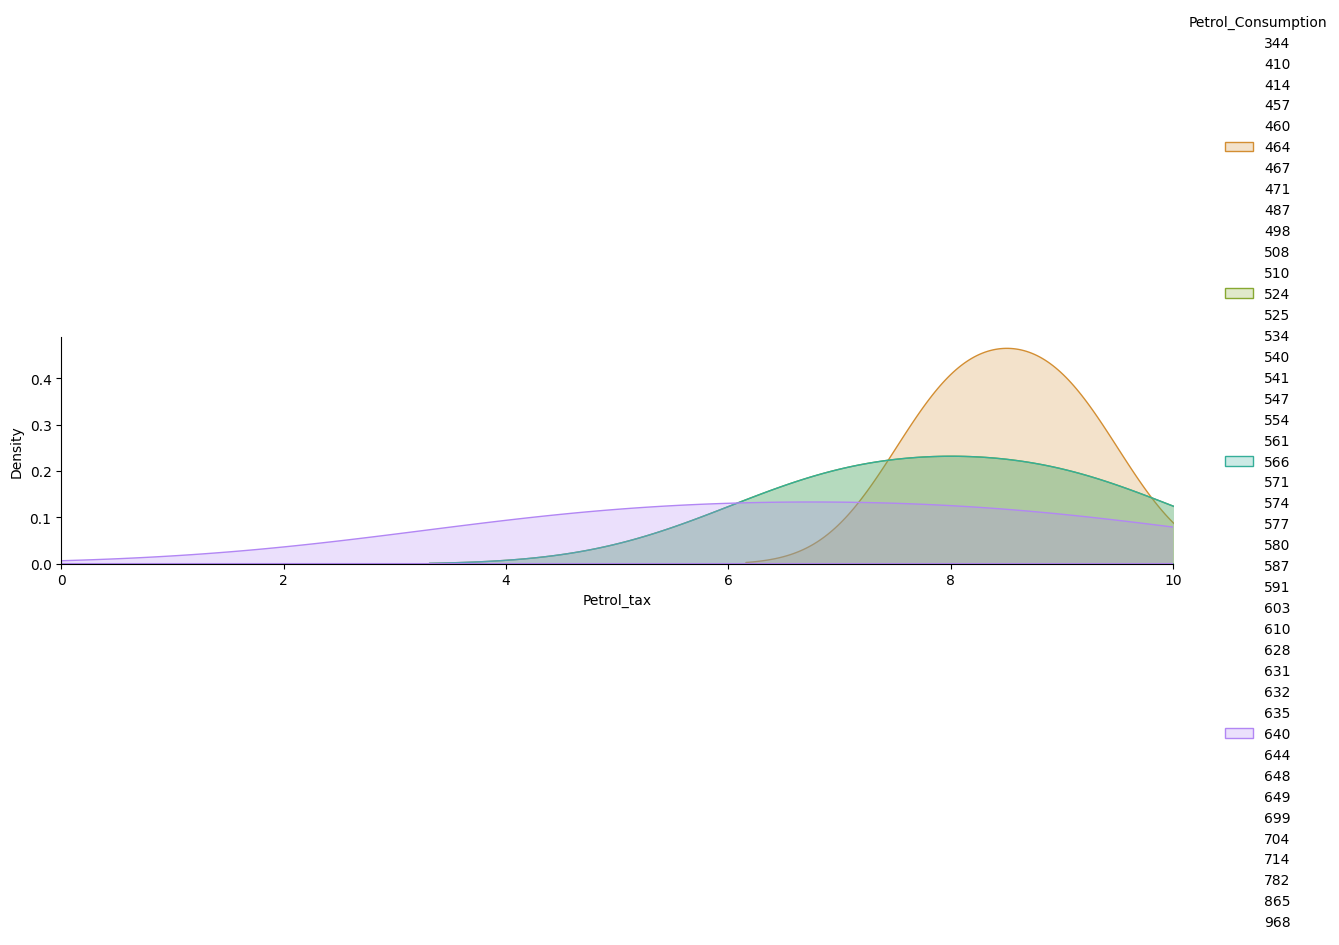

In [19]:
a = sns.FacetGrid(Fuel_cons, hue = 'Petrol_Consumption', aspect=4 )
a.map(sns.kdeplot, 'Petrol_tax', shade= True )
a.set(xlim=(0 ,Fuel_cons['Petrol_tax'].max()))
a.add_legend()

#### Viz 4:  The factor plot shows that people mostly taxes are less when there are paved Highways whereas there is high taxation in petrol fuel where there are less Paved Highways. This shows despite of high petrol taxes the condition of highways are not improved which says the improper management and lack of work done by authority.

In [20]:
axes = sns.factorplot('Petrol_tax','Paved_Highways',data=Fuel_cons, aspect = 2.5, )

AttributeError: module 'seaborn' has no attribute 'factorplot'

##### Dividing Data into Predictors and Target Variables

In [21]:
predictor_var= Fuel_cons[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] #all columns except the last one
target_var= Fuel_cons['Petrol_Consumption'] #only the last column

In [22]:
predictor_var.shape

(48, 4)

In [23]:
target_var.shape

(48,)

### Plotting Decision Tree without using any external tool for Optimization such as Grid Search CV

##### Importing Test Train Split from sklearn package

In [24]:
from sklearn.model_selection import train_test_split

**Now train_test_split will return 4 different parameters. We will name them:\
X_trainset, X_testset, y_trainset, y_testset**

**The train_test_split will need the parameters:\
X, y, test_size=0.3, and random_state=123.**

**The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.**

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(predictor_var,target_var, test_size=0.30, random_state=123)

### Objective 1: Applied Decision Tree algorithm for regression.

Import Decision Tree Regressor and fit the model to the training data.



In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
tree = DecisionTreeRegressor(max_depth=4,max_features=4)

 ##### Inside of the regressor, specify criterion="mse" so we can see the mse of each node.

In [28]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4, max_features=4)

##### Make predictions and evaluate output.



In [29]:
predictions = tree.predict(X_test)

In [30]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
df.head(5)

,Actual,Predicted
18,865,709.0000
13,508,709.0000
26,577,585.0000
31,554,709.0000
10,580,428.0000


We see that the predictions are not accurate. Let's evaluate the prediction accuracy.

##### Evaluating the Prediction Accuracy


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('r2_score:', metrics.r2_score(Y_test,predictions))

Mean Absolute Error: 104.73333333333333
Mean Squared Error: 18194.321333333333
Root Mean Squared Error: 134.88632745142604
r2_score: 0.21283714353178962


##### Looking after Feature Importances

In [32]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=predictor_var.columns).sort_values(ascending=False)

Petrol_tax                     0.3401
Average_income                 0.2970
Paved_Highways                 0.2029
Population_Driver_licence(%)   0.1600
dtype: float64

Importing Graphviz from Sklearn library to plot the decission tree

In [33]:
from sklearn.tree import export_graphviz

In [34]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=predictor_var.columns, out_file=None)

In [35]:
import graphviz

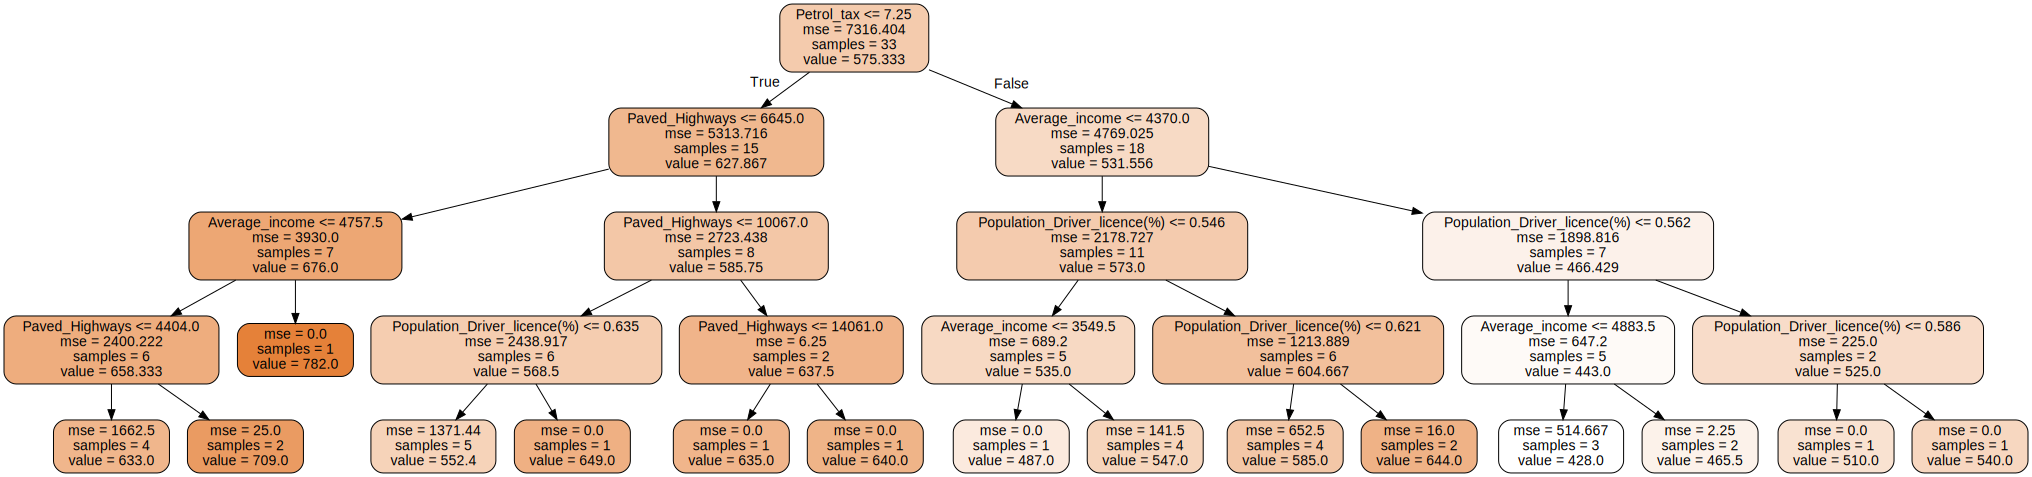

In [36]:
graphviz.Source(dot_data)

The trees follow a top-down greedy approach known as recursive binary splitting. We call it as ‘top-down’ because it begins from the top of tree when all the observations are available in a single region and successively splits the predictor space into two new branches down the tree. It is known as ‘greedy’ because, the algorithm cares (looks for best variable available) about only the current split, and not about future splits which will lead to a better tree.

Stopping Criteria: The most common stopping procedure is to use a minimum count on the number of training instances assigned to each leaf node. If the count is less than some minimum then the split is not accepted and the node is taken as a final leaf node.

For this dataset Petrol_consumption is considered as the Target variable and rest are Predictors:\

**Q.  Why does Tree considered Petrol_tax as Root of Tree?**\
**Ans**The reason could be the feature_importances as from above codes we can see Petrol_tax has feature importance value compared to others. So, the Petrol_tax is selected as root of tree and other features as decision nodes.

**The Split :** Purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

##### Hyperparameters Considered:   max_depth=4,  max_features=4
1. The tree uses Petrol Tax features with threshold value of 7.25 to initially divide the samples.
2. We can see out of 33 Samples the root (Petrol Tax) split into two other decision nodes:\
   i.  Where Petrol_tax <= 7.25 then it uses another feature (Paved Highways) with total number of sample of 15 as decision node.\
   ii.Where Petrol_tax> 7.25 then it uses feature Average Income as another decision node with Sample count of 18.
3. The tree considered Mean Squared Error(MSE) as the determining and decision making criteria. 
4. In the above plotted decision tree every node is a conditon how to split values. The least the MSE the better the result. 
5. We can see from decision nodes there are several boxes known as leaf nodes where MSE=0 and thus tree stops branching from that nodes.



###  Using  Gridsearch & Cross Validation appropriately.

#### Now I will use grid search cv to find the optimal value of hyper_parameters to plot the Decision Tree

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = [{"max_depth":[3,4,5, None], "max_features":[3,4,5,6,7]}]

In [39]:
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123),param_grid = param_grid,cv=10)

In [40]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid=[{'max_depth': [3, 4, 5, None],
                          'max_features': [3, 4, 5, 6, 7]}])

In [41]:
gs.cv_results_['params']

[{'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': 5},
 {'max_depth': 3, 'max_features': 6},
 {'max_depth': 3, 'max_features': 7},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': 5},
 {'max_depth': 4, 'max_features': 6},
 {'max_depth': 4, 'max_features': 7},
 {'max_depth': 5, 'max_features': 3},
 {'max_depth': 5, 'max_features': 4},
 {'max_depth': 5, 'max_features': 5},
 {'max_depth': 5, 'max_features': 6},
 {'max_depth': 5, 'max_features': 7},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': 5},
 {'max_depth': None, 'max_features': 6},
 {'max_depth': None, 'max_features': 7}]

In [42]:
gs.cv_results_['rank_test_score']

array([-2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648,
       -2147483648, -2147483648, -2147483648, -2147483648, -2147483648],
      dtype=int32)

In [43]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features=3, random_state=123)

In [44]:
tree = DecisionTreeRegressor(max_depth=3,max_features=4)

In [45]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, max_features=4)

In [46]:
predictions = tree.predict(X_test)

In [47]:
df=pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
df.head(5) #Check the top 5 predictions and actual values.

,Actual,Predicted
18,865,782.0000
13,508,658.3333
26,577,604.6667
31,554,658.3333
10,580,443.0000


In [48]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('r2_score:', metrics.r2_score(Y_test,predictions))

Mean Absolute Error: 80.11111111111113
Mean Squared Error: 8669.100000000002
Root Mean Squared Error: 93.10800180435622
r2_score: 0.6249382764002026


We use graphviz to plot the dot data as a decision tree.

In [49]:
from sklearn.tree import export_graphviz

In [50]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=predictor_var.columns, out_file=None)

In [51]:
import graphviz

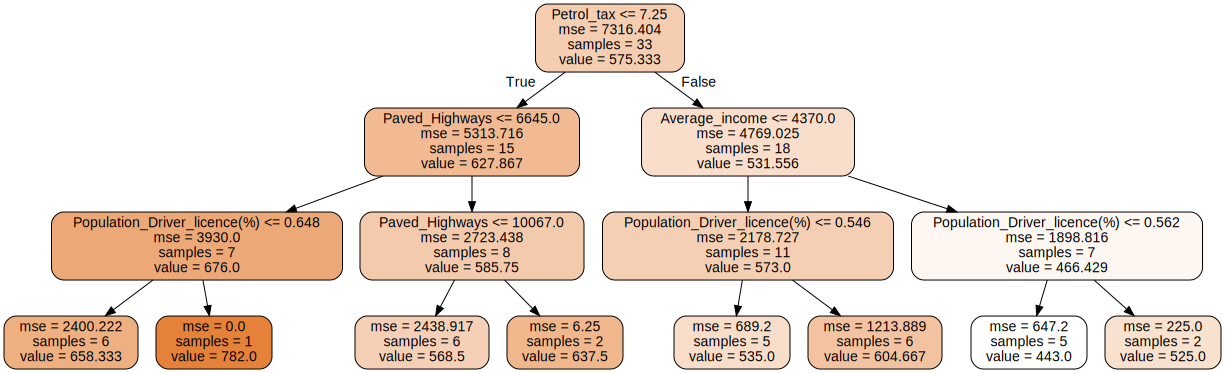

In [52]:
graphviz.Source(dot_data)

The above tree is the optimised result of the Base tree which we have used earlier in this assignment. To Optimisation I have used Grid Search to prune the tree and find the best estimator as shown below:

##### Hyperparameters Considered:   max_depth=3,  max_features=4
**The reason for defining\
i. Maximum depth of tree(vertical depth) to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.\
ii. max_features these are selected randomly but higher value selection results in Overfitting.**

We have used the above mentioned parameters to improve decision tree accuracy and reduce MSE. by fitting in our model this can also be called a one way of prune the tree.

Observation
1. The tree uses Petrol Tax features with threshold value of 7.25 to initially divide the samples.
2. We can see out of 33 Samples the root (Petrol Tax) split into two other decision nodes:\
   i.  Where Petrol_tax <= 7.25 then it uses another feature (Paved Highways) with total number of sample of 15 as decision node.\
   ii.Where Petrol_tax> 7.25 then it uses feature Average Income as another decision node with Sample count of 18.
3. The tree considered Mean Squared Error(MSE) as the determining and decision making criteria. 
4. In the above plotted decision tree every node is a conditon how to split values. The least the MSE the better the result. 
5. We can see from decision nodes there are several boxes known as leaf nodes where MSE=0 and thus tree stops branching from that nodes.



#### The Comparision Of Decision Tree without Applying GridSearch and One by applying with GridSearch

In [53]:
DT_Regressor=[['Max_Depth',4,3],['Max_Feature',4,4],['Mean Abs. Error',106.73,96.6],['Mean Square Error',18466.34,15143.73],['Root Mean Square',135.89,123.05],['r2_Score',0.20,0.344]]
Result_Summary2= pd.DataFrame(DT_Regressor, columns = ['Parameters','Without Grid Search','With Grid Search'])
Result_Summary2

,Parameters,Without Grid Search,With Grid Search
0,Max_Depth,4.0000,3.0000
1,Max_Feature,4.0000,4.0000
2,Mean Abs. Error,106.7300,96.6000
3,Mean Square Error,18466.3400,15143.7300
4,Root Mean Square,135.8900,123.0500
5,r2_Score,0.2000,0.3440
